<h1> WELCOME TO MY PROJECT ✈ ✈ 🥰
                             

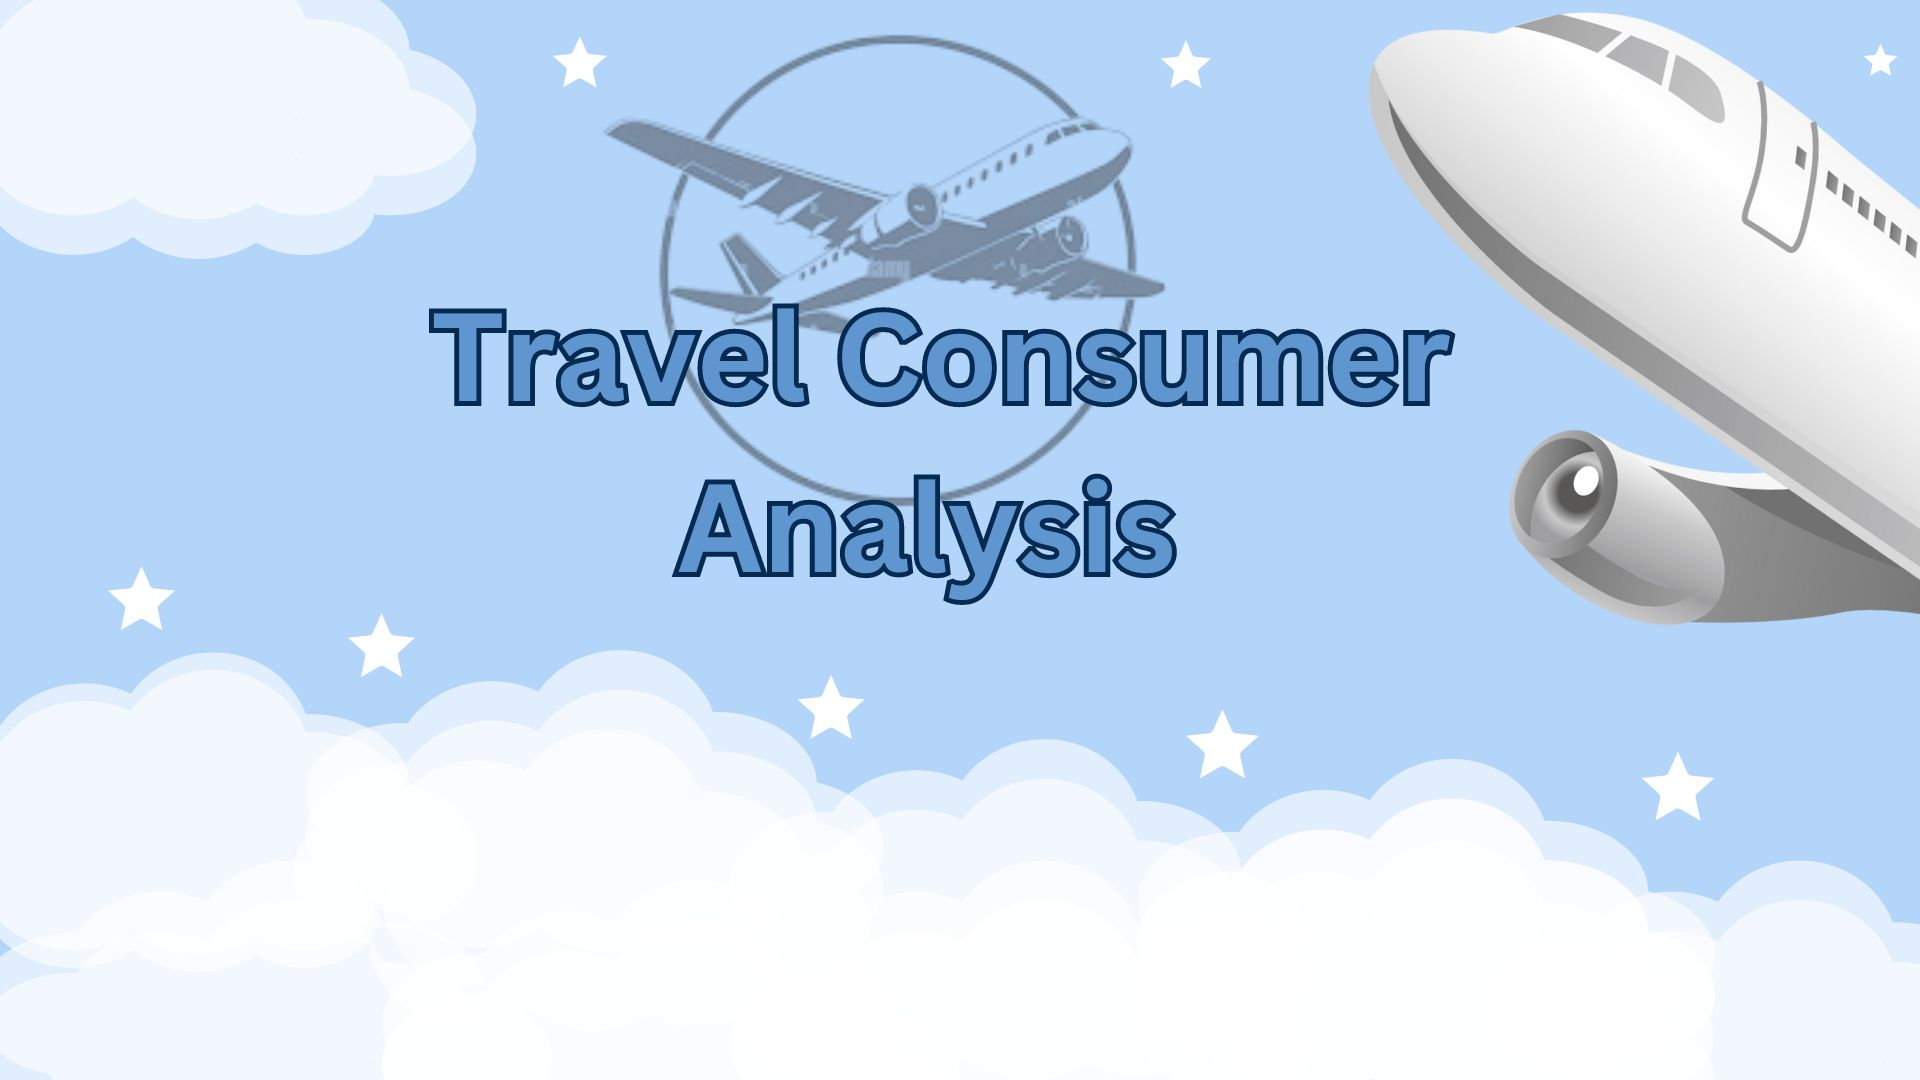

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/coustumer behavioral and travel patterns.csv")

In [ ]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
df.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


# **Data Visualization**

### **How many consumers opted for each service?**

In [ ]:
service_counts=df.groupby("ServicesOpted")["ServicesOpted"].count()
service_counts

,ServicesOpted
ServicesOpted,
1,404
2,176
3,124
4,117
5,69
6,64


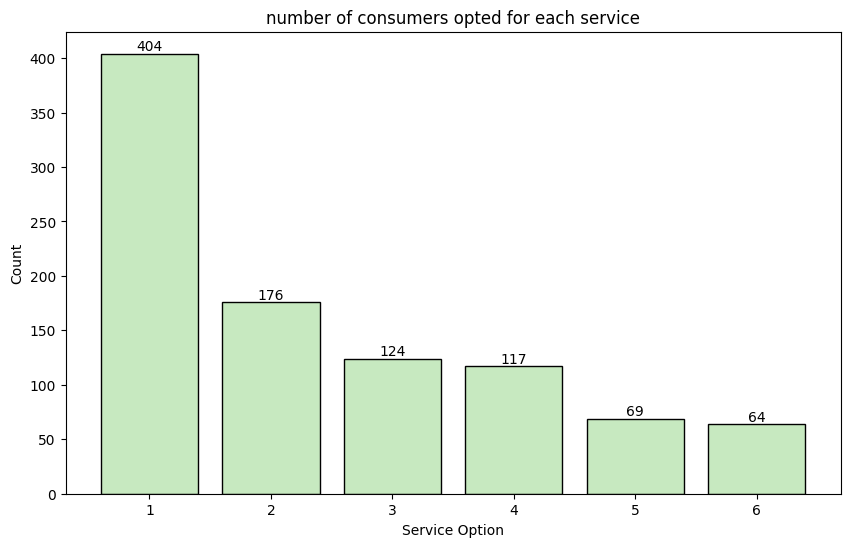

In [ ]:
# Plot a bar chart for the counts of each service option
plt.figure(figsize=(10, 6))
k=plt.bar(service_counts.index, service_counts.values, color='#c7e9c0',edgecolor='black')
plt.xlabel("Service Option")
plt.ylabel("Count")
plt.bar_label(k)
plt.title("number of consumers opted for each service")
plt.show()

### **How does the percentage of hotel tickets booked compare across CX?**

In [ ]:
cx = df.groupby("BookedHotelOrNot")["BookedHotelOrNot"].count()
cx

,BookedHotelOrNot
BookedHotelOrNot,
No,576
Yes,378


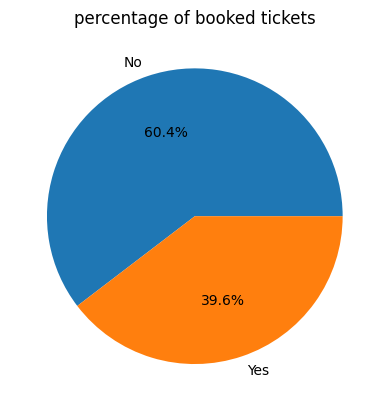

In [ ]:
plt.pie(cx.values, labels=cx.index, autopct='%1.1f%%')
plt.title("percentage of booked tickets")
plt.show()

## ***Income class analysis📊***

### **which classs used to book with the higesht amount of  hotel ticket**

In [ ]:
filterd_df=df[df["BookedHotelOrNot"]=='Yes']
classVShotel_tickets=filterd_df.groupby("AnnualIncomeClass")['BookedHotelOrNot'].count()
classVShotel_tickets

,BookedHotelOrNot
AnnualIncomeClass,
High Income,32
Low Income,130
Middle Income,216


<ipython-input-98-09f71de4a541>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b=sns.barplot(x=classVShotel_tickets.index,y=classVShotel_tickets.values,palette='viridis')


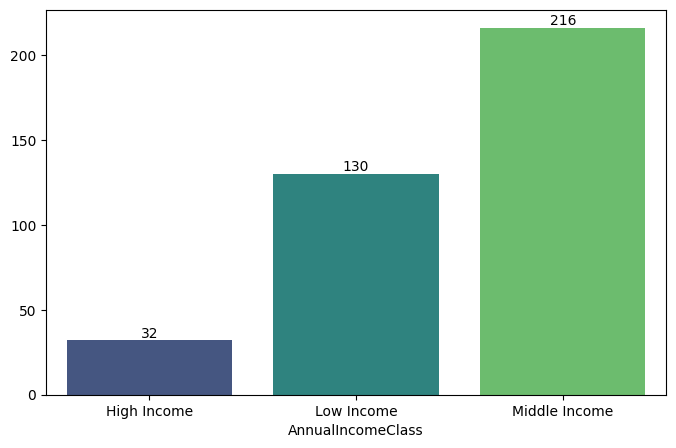

In [ ]:
# @title Sns bar plot
plt.figure(figsize=(8,5))
b=sns.barplot(x=classVShotel_tickets.index,y=classVShotel_tickets.values,palette='viridis')
# Add data labels
for container in b.containers:
    b.bar_label(container)

plt.show()

### **Which class has the highest travel frequency?**

In [ ]:
class_per_income=df.groupby("AnnualIncomeClass")["FrequentFlyer"].count()
class_per_income

,FrequentFlyer
AnnualIncomeClass,
High Income,159
Low Income,386
Middle Income,409


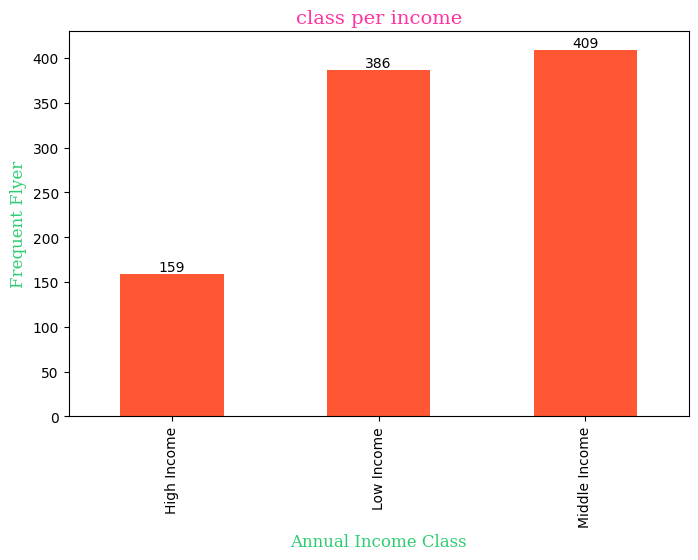

In [ ]:
# !pip install matplotlib --upgrade # upgrade matplotlib to the latest version to apply the bar_label function

import matplotlib.pyplot as plt

x=class_per_income.plot(kind="bar",color='#FF5733',figsize=(8,5))
x.bar_label(x.containers[0]) # use bar_label instead of bars_label

# labels and titles
label_font = {'family': 'serif','color': '#2ECC71','size': 12}
title_font = {'family': 'serif','color': '#FF33A1','size': 14}

plt.xlabel("Annual Income Class", fontdict=label_font)
plt.ylabel("Frequent Flyer", fontdict=label_font)
plt.title("class per income", fontdict=title_font)
plt.show()

### **Which income class shows the highest rate of account synchronization with social media?**

In [ ]:
class_per_income = df.groupby("AnnualIncomeClass")["AccountSyncedToSocialMedia"].count()
class_per_income

,AccountSyncedToSocialMedia
AnnualIncomeClass,
High Income,159
Low Income,386
Middle Income,409


<ipython-input-161-22d1c7cc33e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(y=class_per_income.index, x=class_per_income.values, palette='cubehelix')


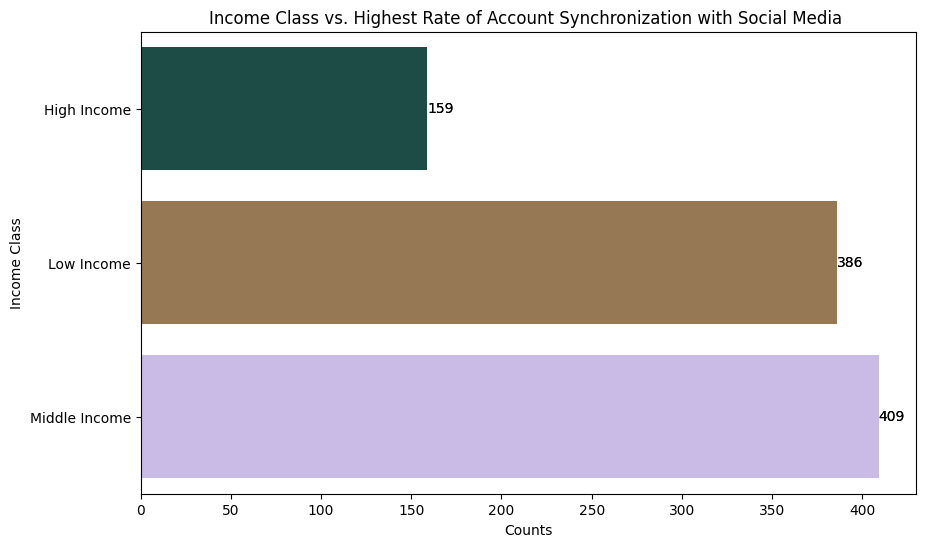

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

b = sns.barplot(y=class_per_income.index, x=class_per_income.values, palette='cubehelix')

# Add data labels
for container in b.containers:
    b.bar_label(container)

# Adding data labels to the bars
for index, value in enumerate(class_per_income.values):
    plt.text(value, index, str(value), va='center')

plt.xlabel("Counts")
plt.ylabel("Income Class")
plt.title("Income Class vs. Highest Rate of Account Synchronization with Social Media ")

plt.show()


### **what is the  relationship between age and the probability of syncing accounts to social media?**

In [ ]:
new_var = df.groupby("AccountSyncedToSocialMedia")["Age"].mean()
new_var

,Age
AccountSyncedToSocialMedia,
No,32.151515
Yes,32.038889


<ipython-input-104-f5f0d14fd180>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b=sns.barplot(x=new_var.index,y=new_var.values,palette='viridis')


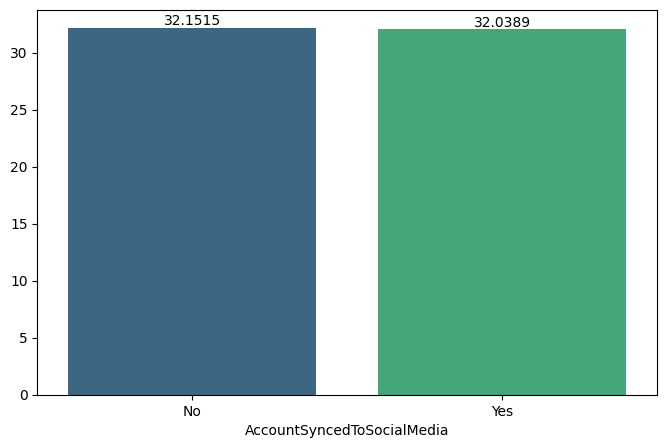

In [ ]:
plt.figure(figsize=(8,5))
b=sns.barplot(x=new_var.index,y=new_var.values,palette='viridis')
# Add data labels
for container in b.containers:
    b.bar_label(container)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    int64 
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 52.3+ KB


In [ ]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,Middle Income,6,No,Yes,0
1,34,1,Low Income,5,Yes,No,1
2,37,0,Middle Income,3,Yes,No,0
3,30,0,Middle Income,2,No,No,0
4,30,0,Low Income,1,No,No,0


## ***Age of individuals analysis 📊***

### **How Does Social Media Account Syncing Vary Across Different Age Groups?**

In [ ]:
df['FrequentFlyer'].unique()

array([ 0,  1, -1])

In [ ]:
df['AccountSyncedToSocialMedia'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_filtered = df[(df['AccountSyncedToSocialMedia'] == 'Yes')]

df_filtered.groupby("Age")[["AccountSyncedToSocialMedia"]].count()

,AccountSyncedToSocialMedia
Age,
27,22
28,25
29,28
30,97
31,33
33,15
34,44
35,18
36,21


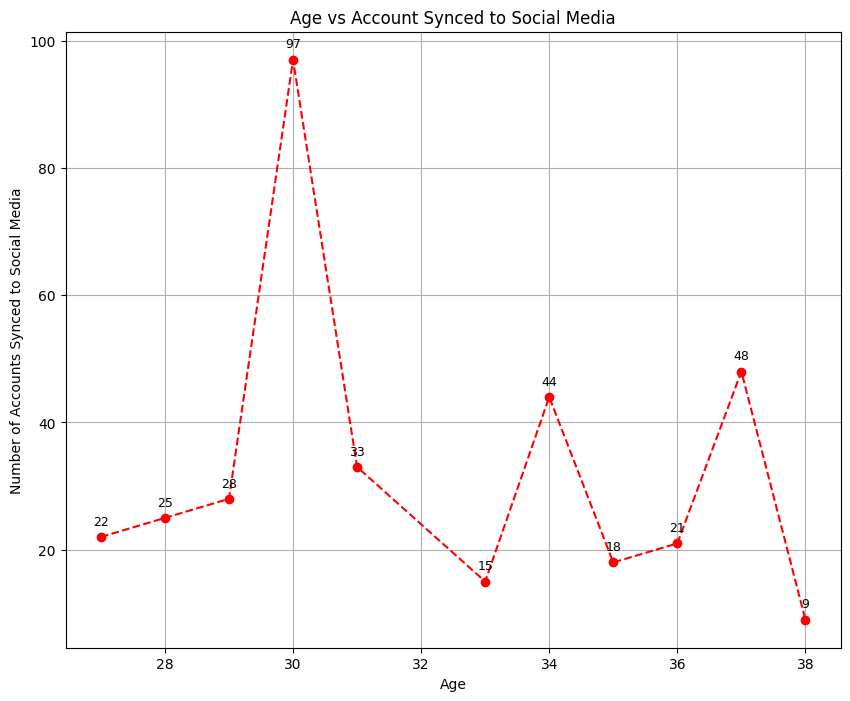

In [ ]:
import matplotlib.pyplot as plt

counts = df_filtered.groupby("Age")["AccountSyncedToSocialMedia"].count()

# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(counts.index, counts.values, marker='o', color='red', linestyle='--')

# Add data labels
for i, (index, value) in enumerate(zip(counts.index, counts.values)):
    plt.text(index, value + 1.4, str(value), ha='center', va='bottom', fontsize=9, color='black')
# add
plt.xlabel("Age")
plt.ylabel("Number of Accounts Synced to Social Media")
plt.title("Age vs Account Synced to Social Media")
plt.grid(True)
plt.show()


### **Is there a correlation between Frequent Flyer status and achieving the target?**

Correlation coefficient: 0.3838174729890483


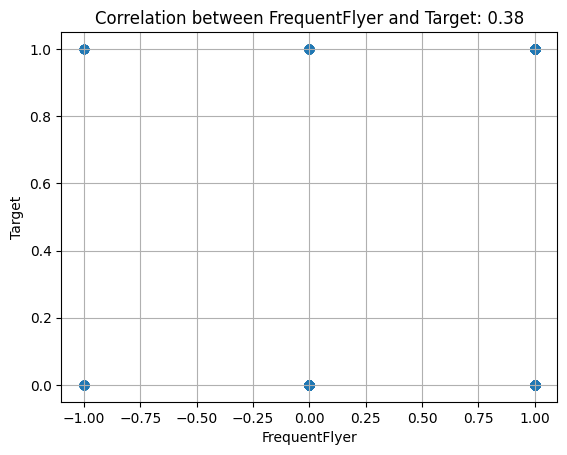

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot between FrequentFlyer and Target
plt.scatter(df["FrequentFlyer"], df["Target"])
# Calculate and print correlation
correlation = df['FrequentFlyer'].corr(df['Target'])
print(f'Correlation coefficient: {correlation}')


plt.xlabel("FrequentFlyer")
plt.ylabel("Target")
plt.title(f"Correlation between FrequentFlyer and Target: {correlation_value:.2f}")
plt.grid(True)
# Show the scatter plot
plt.show()


as we see there's no correlation at all


**<h1> A Model to Forecast Ticket Sales: Predicting Hotel Booking Likelihood </h1>**

### **Objective of this model --->  Predict whether a customer will book a hotel based on various features.**

In [ ]:
pip install matplotlib seaborn scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [ ]:
# Prepare features and target variable
X = df[['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted', 'AccountSyncedToSocialMedia']]
y = df['BookedHotelOrNot']

# Convert categorical columns to strings if they are not already
X['AccountSyncedToSocialMedia'] = X['AccountSyncedToSocialMedia'].astype(str)
X['AnnualIncomeClass'] = X['AnnualIncomeClass'].astype(str)

# Convert target variable to binary numeric values BEFORE splitting
y = y.map({'No': 0, 'Yes': 1})

# Define preprocessor for numeric and categorical features
numeric_features = ['Age', 'FrequentFlyer', 'ServicesOpted']
categorical_features = ['AnnualIncomeClass', 'AccountSyncedToSocialMedia']

# Create transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Create a column transformer that applies transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with RandomForestClassifier and hyperparameter tuning
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)



<ipython-input-77-9f6cb0593a79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AccountSyncedToSocialMedia'] = X['AccountSyncedToSocialMedia'].astype(str)
<ipython-input-77-9f6cb0593a79>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AnnualIncomeClass'] = X['AnnualIncomeClass'].astype(str)


Accuracy: 0.7003484320557491
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.87      0.77       164
           1       0.73      0.48      0.58       123

    accuracy                           0.70       287
   macro avg       0.71      0.67      0.67       287
weighted avg       0.71      0.70      0.69       287



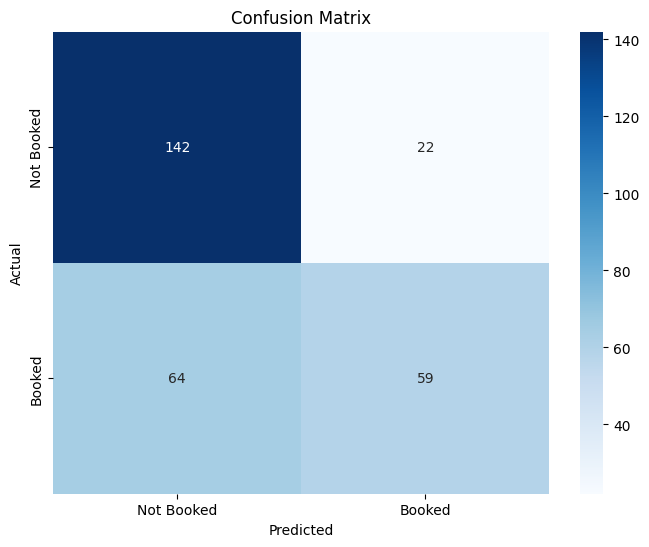

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Booked', 'Booked'], yticklabels=['Not Booked', 'Booked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Heat map explains:
That this enhanced model shows a significant improvement with a balanced precision and recall. While it excels at predicting 'Not Booked', there's room for improvement in identifying 'Booked' cases. Further fine-tuning and feature exploration are recommended.

<function matplotlib.pyplot.show(close=None, block=None)>

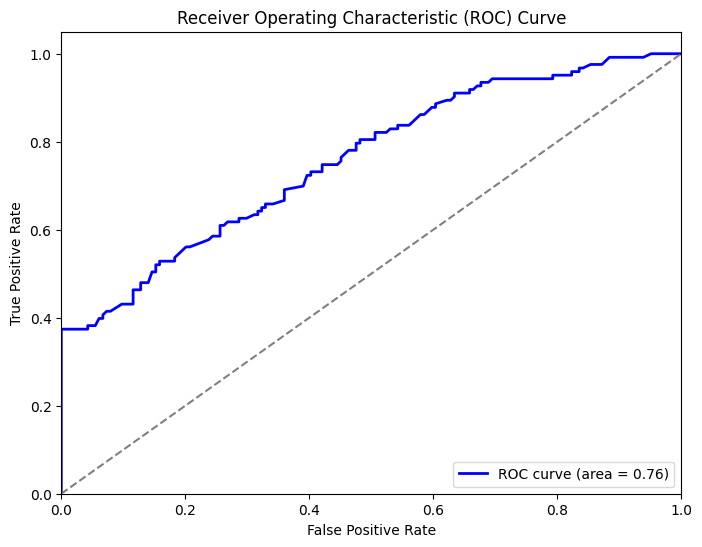

In [ ]:
# Compute ROC curve and ROC area
y_prob = best_model.predict_proba(X_test)[:, 1]  # Use best_model, which is fitted
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show